In [2]:
from scipy.spatial import KDTree
from scipy.stats import linregress
import numpy as np
import pylab as plt
plt.style.use('dark_background')

# Dimensionality Fractals Test Cases
This notebook is an extension of the pytest file used in TDD. It shows the results of the following function(s) in the library

- get_henon_map
- get_fractal_dimension

In [26]:
def get_henon_map(a=1.4,b=0.3,x0=0,y0=0,N_iterations = 1000):
    """
    Computes Henon map for a given set of parameters and initial values.
    Reference: https://projecteuclid.org/journals/communications-in-mathematical-physics/volume-50/issue-1/A-two-dimensional-mapping-with-a-strange-attractor/cmp/1103900150.full
    Reference: https://blbadger.github.io/henon-map.html

    Parameters:
    a,b:  scalars
        parameters of the map. Select default values to see attractor
    x0,y0:  scalars
        initial conditions. Select default values to see attractor
    N_iterations:  scalar
        Number of iterations

    Returns:
    lX, lY:  two lists
        values of the Henon Map
    """
    lX = [0]
    lY = [0]
    for _ in range(N_iterations):
        x_n = lX[-1]
        y_n = lY[-1]
        x_np1 = 1 - a*x_n*x_n + y_n
        y_np1 = b*x_n
        lX.append(x_np1)
        lY.append(y_np1)
    return(np.array([lX,lY]).T)

In [4]:
lX, lY = get_henon_map(a=1.4,b=0.3,x0=0,y0=0,N_iterations = 10000)

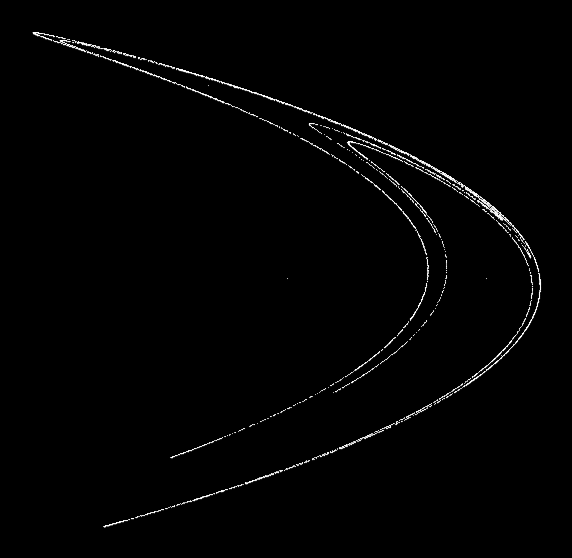

In [5]:
plt.figure(figsize=(10,10))
plt.plot(lX, lY, '^', color='white', alpha = 0.8, markersize=0.3)
plt.axis('off')
plt.savefig('Henon.png')
plt.show()

In [16]:
def get_box_count(fractal, epsilon):
    """
    Computes box count method for a given data set. We pick a random point in the fractal, find the nearest neighbors 
    with in a distance epsilon. Then it removes all those point and iterate until all points have a box.
    Reference: https://public.lanl.gov/jt/Papers/est-fractal-dim.pdf
    Reference: https://blbadger.github.io/henon-map.html

    Parameters:
    fractal:  2-d array 
        list of points in the fractal
    epsilon:  scalars
        size of the box

    Returns:
    N_X:  scalar
        Number of boxes needed to cover the fractal
    """
    fractal_iter = np.copy(fractal)
    N_Box = 0
    while len(fractal_iter)>0:
        tree = KDTree(fractal_iter)
        random_index_set = np.random.choice(np.arange(len(fractal_iter)),size=1,replace=False)
        random_point_set = fractal_iter[random_index_set]
        lPointsCovered = tree.query_ball_point(random_point_set,r=epsilon).flatten()
        new_index_set = np.setdiff1d(np.arange(len(fractal_iter)),lPointsCovered[0])
        N_Box = N_Box + 1
        fractal_iter = fractal_iter[new_index_set]
    return(N_Box)

In [17]:
def get_fractal_dimension(fractal,min_exp, max_exp, delta_exp,N_trials):
    """
    Computes fractal dimension from the box count method for a given data set. 
    Iterates over a set of exponents to compute the epsilon and cover the fractal. Finds the smallest number of boxes. 
    Then performs a linear regression on the log-log scale.
    Reference: https://public.lanl.gov/jt/Papers/est-fractal-dim.pdf
    Reference: https://blbadger.github.io/henon-map.html

    Parameters:
    fractal:  2-d array 
        list of points in the fractal
    min_exp, max_exp:  scalars
        min and max exponent of the epsilon
    delta_exp: scalar
        fine grain distance to divide [min_exp, max_exp]
    N_trails:
        number of trails to cover the fractal.

    Returns:
    slope:  scalar
        Fractal Dimension
    """
    lN = []
    lEPS = []
    for eps_exp in np.arange(min_exp,max_exp,delta_exp):
        lN.append(min([get_box_count(fractal, epsilon=np.power(10,eps_exp)) for _ in range(N_trials)]))
        lEPS.append(np.power(10,eps_exp))
    slope, intercept, r, p, se = linregress(np.log10(lEPS),np.log10(lN))
    lX = np.array([min_exp,max_exp])
    lY = slope*lX + intercept
    fig = plt.figure(figsize=(10,10))
    plt.scatter(np.log10(lEPS),np.log10(lN))
    plt.plot(lX,lY)
    plt.savefig('fractal_dimension.png')
    return(-slope)

In [32]:
henon = np.array([lX,lY]).T

1.2566949770442724

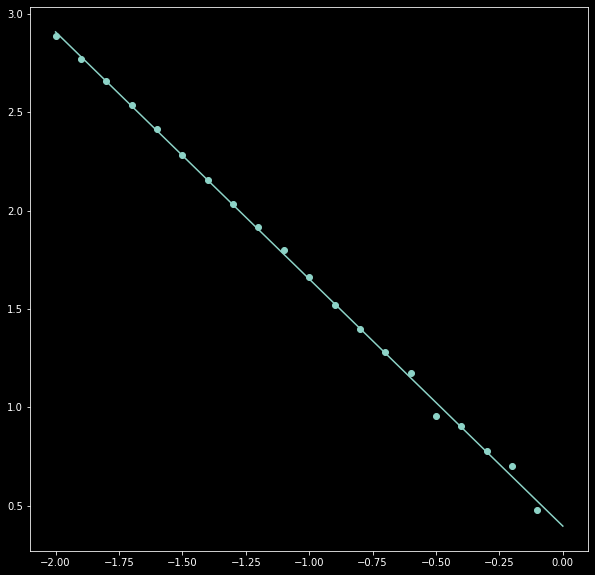

In [33]:
get_fractal_dimension(fractal=henon,min_exp=-2, max_exp=0, delta_exp=0.1,N_trials=10)

In [36]:
def test_get_fractal_dimension_henon():

    henon = get_henon_map(a=1.4,b=0.3,x0=0,y0=0,N_iterations = 10000)
    print(henon.shape)
    dim = get_fractal_dimension(fractal=henon,min_exp=-2, max_exp=0, delta_exp=0.1,N_trials=10)
    print(np.abs(dim - 1.261))
    print(dim)

(10001, 2)
0.0030921322016117525
1.2579078677983881


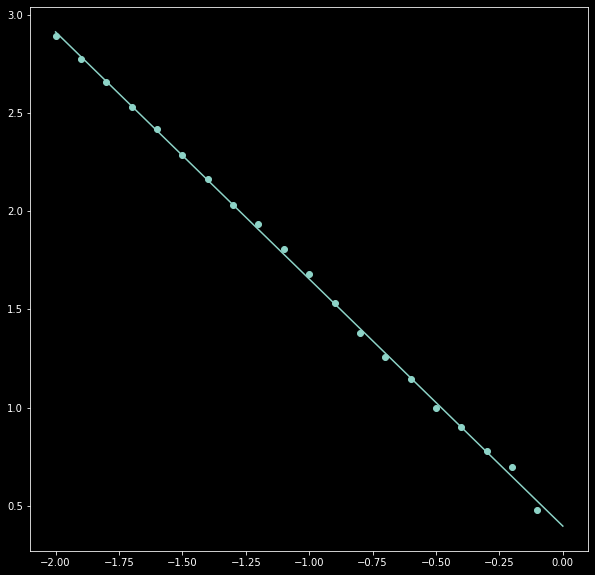

In [37]:
test_get_fractal_dimension_henon()

In [38]:
lTheta = np.arange(0,2*np.pi,2*np.pi/10000)
lX_circle = np.cos(lTheta)
lY_circle = np.sin(lTheta)
circle = np.array([lX_circle,lY_circle]).T

1.0256267886999646

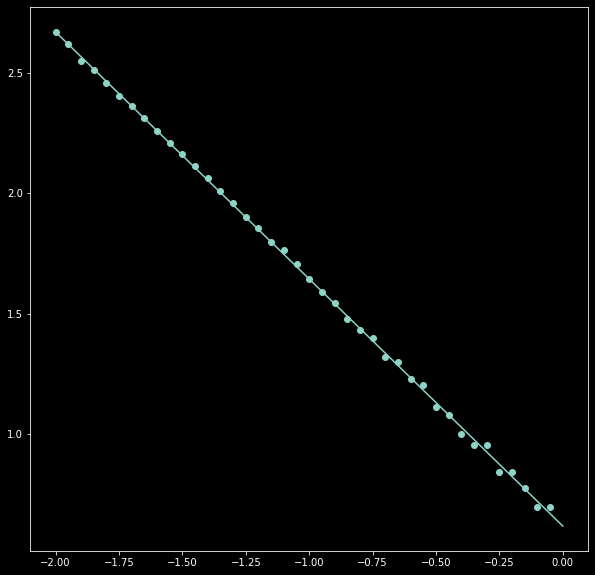

In [40]:
get_fractal_dimension(fractal=circle,min_exp=-2, max_exp=0, delta_exp=0.05,N_trials=10)